# Segmentation Testing

A file which provides examples for testing and optimizing the segmentation process

In [1]:
from immas import segmentation, preprocessing, MammogramImage
from immas.basic_functions import show_image_plt
import numpy, cv2, os
from immas.io import read_dataset

In [2]:
help(segmentation.multithresholding)
help(segmentation.mean_shift)

Help on function multithresholding in module immas.segmentation:

multithresholding(img)
    Performs multi-thresholding to aid segmentation.
    
    Args:
    img: GRAYSCALE image file.
    
    Returns:
    thresholded_img (uint8): thresholded image file.

Help on function mean_shift in module immas.segmentation:

mean_shift(img, sp, sr)
    Performs mean shifting to aid segmentation.
    
    Args:
    img: image file.
    sp (int): The spatial window radius.
    sr (int): The color window radius.
    
    Returns:
    shifted_img (uint8, gray): shifted image file.



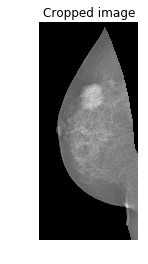

In [3]:
path_image = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.png"
pectoral_muscle = "../dataset/pectoral_muscle_masks/20587080_b6a4f750c6df4f90_MG_R_ML_ANON.tif"
mm = MammogramImage(path_image, path_mask, pmuscle_mask_path=pectoral_muscle)
show_image_plt(mm.image_data,'Cropped image')

## Implement Mean Shift

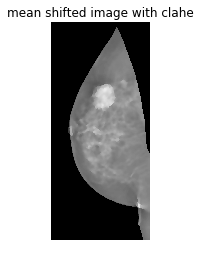

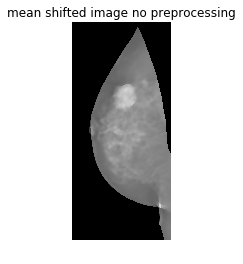

In [4]:
clahe = preprocessing.clahe(mm.image_data)
shifted_clahe = segmentation.mean_shift(clahe,20,30)
shifted = segmentation.mean_shift(mm.image_data,20,30)
show_image_plt(shifted_clahe,"mean shifted image with clahe")
show_image_plt(shifted,"mean shifted image no preprocessing")

## Implement multithresholding

C:\Users\mahle\Anaconda3\lib\site-packages\immas-1.0-py3.6.egg\immas\segmentation.py:50: RuntimeWarning: invalid value encountered in double_scalars


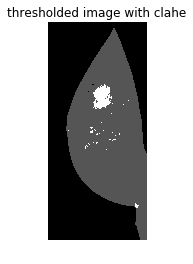

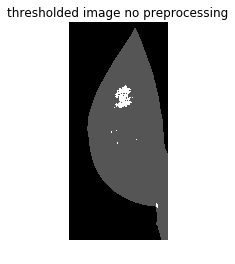

In [11]:
thresh_clahe = segmentation.multithresholding(clahe)
show_image_plt(thresh_clahe, 'thresholded image with clahe')
thresh = segmentation.multithresholding(mm.image_data)
show_image_plt(thresh, 'thresholded image no preprocessing')

## Turn Thresholded Image to Binary

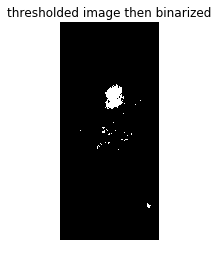

In [6]:
binary = segmentation.thresh_to_binary(thresh_clahe)
show_image_plt(binary, 'thresholded image then binarized')

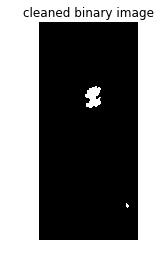

In [10]:
segmented_images = preprocessing.open(binary,(20,20))
show_image_plt(segmented_images, 'cleaned binary image')

In [21]:
def testPreProcessing (img):
    #img = preprocessing.open(img)
    #img = preprocessing.close(img)
    #img = preprocessing.erode(img)
    #img = preprocessing.dilate(img)
    #img = preprocessing.clahe(img)
    img = preprocessing.morphoEnhancement(img,2)
    #img = preprocessing.waveletTransform(img)#.astype('uint16')
    return img

def testPreProcessing2 (img):
    #img = preprocessing.open(img)
    #img = preprocessing.close(img)
    #img = preprocessing.erode(img)
    #img = preprocessing.dilate(img)
    img = preprocessing.clahe(img, 2, 8)
    #img = preprocessing.morphoEnhancement(img,2)
    #img = preprocessing.waveletTransform(img)#.astype('uint16')
    return img

# Defines function to apply segmentation techniques.
# This can be used to try different parameters for the segmentation functions.
# Also can be used to try those functions in different orders.

def testSegmentation(img):
    #img = segmentation.mean_shift(img,20,30)
    img = segmentation.multithresholding(img)
    img = segmentation.thresh_to_binary(img)
    img = preprocessing.open(img,(20,20))
    return img

Reading list of files...
Reading mamograms images and all additional data...
All data have been successfully loaded.
Number of images for training is 6, number of images for testing is 18


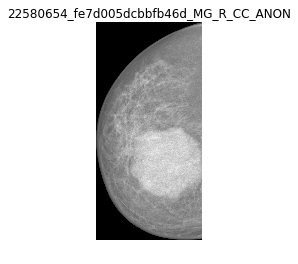

C:\Users\mahle\Anaconda3\lib\site-packages\immas-1.0-py3.6.egg\immas\segmentation.py:50: RuntimeWarning: invalid value encountered in double_scalars


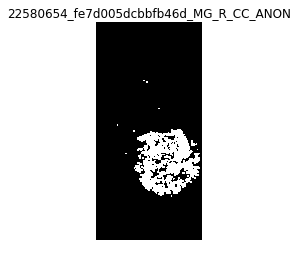

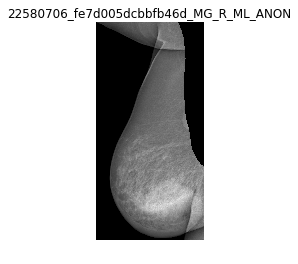

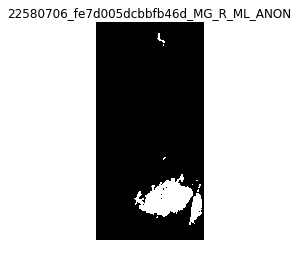

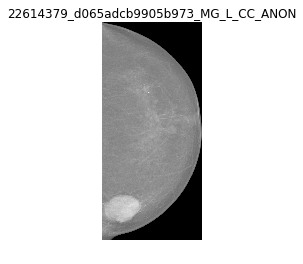

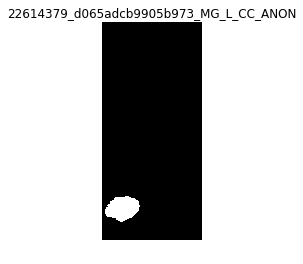

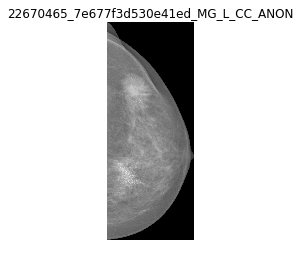

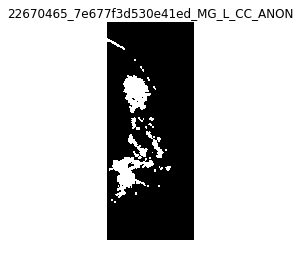

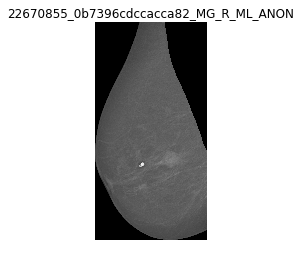

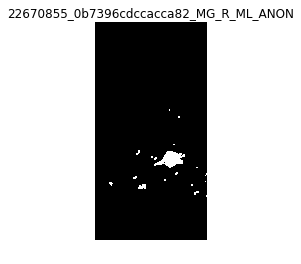

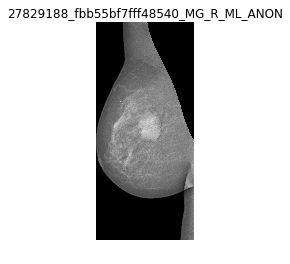

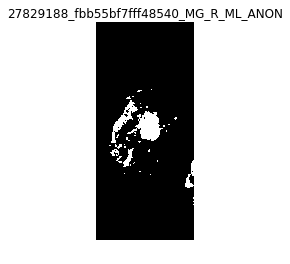

In [22]:
#Trying with preprocessing 1

data_set = read_dataset(image_folder="../dataset/masses_examples",
            mask_folder="../dataset/masks",
            results_folder="../dataset/groundtruth",
            pmuscle_mask_folder="../dataset/pectoral_muscle_masks")

print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

img = data_set["train"]
for m in img:
    m.read_data()
    show_image_plt(m.image_data,"{}".format(m.file_name))
    m.image_data = testPreProcessing(m.image_data)
    m.image_data = testSegmentation(m.image_data)
    show_image_plt(m.image_data,"{}".format(m.file_name))
    
#img = data_set["test"]
#for m in img:
#    m.read_data()
#    m.image_data = testPreProcessing(m.image_data)
#    cv2.imwrite(os.path.join(savepath, m.file_name) + '.tif', m.uncropped_image)
    

In [20]:
# Trying with preprocessing 2
data_set = read_dataset(image_folder="../dataset/masses_examples",
            mask_folder="../dataset/masks",
            results_folder="../dataset/groundtruth",
            pmuscle_mask_folder="../dataset/pectoral_muscle_masks")

print("Number of images for training is {0}, number of images for testing is {1}".format(
    len(data_set["train"]), len(data_set["test"])))

av_jaccard = 0
img = data_set["train"]
for m in img:
    m.read_data()
    m.image_data = testPreProcessing2(m.image_data)
    m.image_data = testSegmentation(m.image_data)
    segmented_image = (m.uncropped_image).astype('uint8')
    av_jaccard = av_jaccard + segmentation.jaccard_index(segmented_image,m.image_ground_truth)
    
print("Average jaccard index for training set is {}".format(av_jaccard/len(data_set["train"])))

#img = data_set["test"]
#for m in img:
#    m.read_data()
#    m.image_data = testPreProcessing(m.image_data)
#    cv2.imwrite(os.path.join(savepath, m.file_name) + '.tif', m.uncropped_image)
    

Reading list of files...
Reading mamograms images and all additional data...
All data have been successfully loaded.
Number of images for training is 6, number of images for testing is 18


C:\Users\mahle\Anaconda3\lib\site-packages\immas-1.0-py3.6.egg\immas\segmentation.py:50: RuntimeWarning: invalid value encountered in double_scalars


Average jaccard index for training set is 0.6256661704698195
